# DAT210x - Programming with Python for DS

## Module6- Lab4

This code is intentionally missing! Read the directions on the course lab page!

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

In [15]:
C = 1
kernel = 'linear'
iterations = 20000

In [16]:
FAST_DRAW = True

In [17]:
def drawPlots(model, wintitle='Figure 1'):
  # INFO: A convenience function for you
  # You can use this to break any higher-dimensional space down
  # And view cross sections of it.

  # If this line throws an error, use plt.style.use('ggplot') instead
  mpl.style.use('ggplot') # Look Pretty

  padding = 3
  resolution = 0.5
  max_2d_score = 0

  y_colors = ['#ff0000', '#00ff00', '#0000ff']
  my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
  colors = [y_colors[i] for i in y_train]
  num_columns = len(X_train.columns)

  fig = plt.figure()
  fig.canvas.set_window_title(wintitle)
  
  cnt = 0
  for col in range(num_columns):
    for row in range(num_columns):
      # Easy out
      if FAST_DRAW and col > row:
        cnt += 1
        continue

      ax = plt.subplot(num_columns, num_columns, cnt + 1)
      plt.xticks(())
      plt.yticks(())

      # Intersection:
      if col == row:
        plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
        cnt += 1
        continue


      # Only select two features to display, then train the model
      X_train_bag = X_train.ix[:, [row,col]]
      X_test_bag = X_test.ix[:, [row,col]]
      model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
      x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
      y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())

      # Prepare the contour
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
      plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


      score = round(model.score(X_test_bag, y_test) * 100, 3)
      plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
      max_2d_score = score if score > max_2d_score else max_2d_score

      cnt += 1

  print "Max 2D Score: ", max_2d_score
  fig.set_tight_layout(True)


def benchmark(model, wintitle='Figure 1'):
  print '\n\n' + wintitle + ' Results'
  s = time.time()
  for i in range(iterations):    
    #
    # TODO: train the classifier on the training data / labels:
    #
    # .. your code here ..
    a = model.fit(X_train, y_train)
  print "{0} Iterations Training Time: ".format(iterations), time.time() - s

  s = time.time()
  for i in range(iterations):
    #
    # TODO: score the classifier on the testing data / labels:
    #
    # .. your code here ..
    score = a.score(X_test, y_test)
  print "{0} Iterations Scoring Time: ".format(iterations), time.time() - s
  print "High-Dimensionality Score: ", round((score*100), 3)
  score = None

In [18]:
X = pd.read_csv('Datasets/wheat.data', index_col = 0)
print X.head()

     area  perimeter  compactness  length  width  asymmetry  groove wheat_type
id                                                                            
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220       kama
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956       kama
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825       kama
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805       kama
4   16.14      14.99       0.9034   5.658  3.562      1.355   5.175       kama


In [19]:
X.dropna(axis = 0, how = 'any', inplace = True)

In [20]:
y = X.wheat_type
X.drop('wheat_type', axis = 1, inplace = True)
print X.head(6)
y = y.map({'canadian': 0, 'kama': 1, 'rosa': 2})

     area  perimeter  compactness  length  width  asymmetry  groove
id                                                                 
0   15.26      14.84       0.8710   5.763  3.312      2.221   5.220
1   14.88      14.57       0.8811   5.554  3.333      1.018   4.956
2   14.29      14.09       0.9050   5.291  3.337      2.699   4.825
3   13.84      13.94       0.8955   5.324  3.379      2.259   4.805
4   16.14      14.99       0.9034   5.658  3.562      1.355   5.175
5   14.38      14.21       0.8951   5.386  3.312      2.462   4.956


In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)


In [22]:
from sklearn.svm import SVC
svc = SVC(C = C, kernel = kernel)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [24]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth = 1, random_state = 2)



KNeighbors Results
20000 Iterations Training Time:  5.09426999092
20000 Iterations Scoring Time:  11.9369449615
High-Dimensionality Score:  83.607


/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Max 2D Score:  90.164


SVC Results
20000 Iterations Training Time:  11.5047800541
20000 Iterations Scoring Time:  4.4215657711
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


Tree Results
20000 Iterations Training Time:  5.63690900803
20000 Iterations Scoring Time:  3.49949789047
High-Dimensionality Score:  68.852
Max 2D Score:  68.852


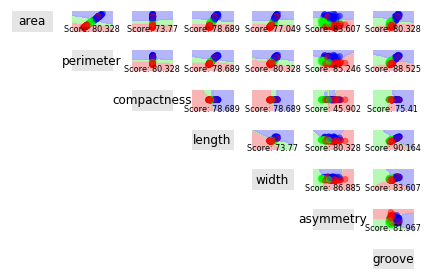

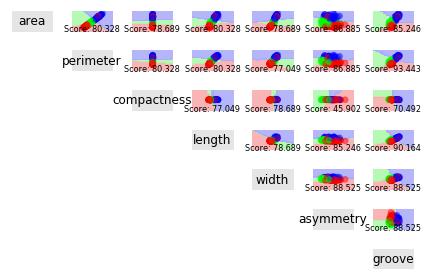

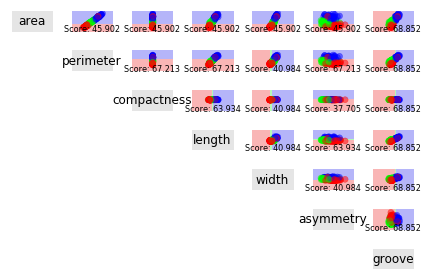

In [25]:
benchmark(knn, 'KNeighbors')
drawPlots(knn, 'KNeighbors')

benchmark(svc, 'SVC')
drawPlots(svc, 'SVC')

benchmark(dtree, 'Tree')
drawPlots(dtree, 'Tree')

plt.show()